In [ ]:
classifier = pipeline('sentiment-analysis', model='oliverguhr/german-sentiment-bert')
#classifier("Ich bin so sauer, dass dieser scheiss code nicht funtioniert", top_k=3)[0]
classifier('Meine Damen und Herren, ich habe den Eindruck, daß das Ergebnis der Abstimmung, die wir eben vorgenommen haben, nicht ganz ohne Einfluß auf die Antragsfreudigkeit des Kollegen Blücher gewesen ist.\n({0})\nIm allgemeinen geben wir Sozialdemokraten Appellen an unsere Courtoisie gerne Gehör; aber in diesem Falle muß ich das Hohe Haus bitten, diesen Antrag abzulehnen. Die Damen und Herren,\n\n({1})\ndie sich um die Vertagung bemühen, hatten, glaube ich, 30 mal 24 Stunden Zeit, sich zu überlegen, auf welche Prinzipien hin sie ihre Regierung bilden wollten.\n({2})\nWenn ich nicht falsch unterrichtet bin, hat man diese Zeit vom 14. August ab fleißig genutzt. Ich kann mir nicht vorstellen, daß ein weiterer Verzug von 24 Stunden sehr viel mehr Weisheit in die Entschlüsse der verantwortlichen Männer bringen könnte.\n({3})\nIch glaube daher, daß das Hohe Haus darauf bestehen sollte, die Regierungserklärung am Montag verlesen zu bekommen, und zwar gibt es dafür einen sehr triftigen Grund: wir werden für die Debatte über die Regierungserklärung eine ganze Reihe von Tagen brauchen. Ich glaube sogar, daß wir darüber eine Woche debattieren werden. Ich nehme nicht an, daß die Argumente, die der Herr Bundeskanzler uns geben wird, so sein werden, daß schon die Debatte eines Tages sie erledigen könnte.\n({4})\nIch könnte mir vorstellen, daß die Regierungserklärung so füllig ist, so angefüllt mit Vorschlägen, so tiefgründig,\n({5})\ndaß man der Opposition, die keine 30 mal 24 Stunden zur Verfügung haben wird, doch die Zeit geben sollte, sich mit allem zu befassen, was uns diese Regierungserklärung kund und zu wissen tun wird. Da ich unsern verehrten Bundeskanzler schon recht lange kenne und daher weiß, wie reich seine politische Phantasie ist, bin ich überzeugt, daß er uns Stoff für eine Debatte geben wird, die sicher eine Woche dauern wird.\nWenn wir also die Regierungserklärung statt am Montag erst am Dienstag verlesen bekommen, verlieren wir einen Tag Zeit.\n({6})\nDie Erfahrung zeigt, meine Herren, daß von Freitag ab sehr wenige Abgeordnete mehr Lust haben werden, hier in Bonn zu bleiben.\n({7})\n- Das war Ihr Pech!\n({8})\nAus diesen Gründen, meine Damen und Herren, bitte ich Sie, den Antrag abzulehnen.\n',top_k=3)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

All the weights of TFBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.
Device set to use 0


[{'label': 'neutral', 'score': 0.9565878510475159},
 {'label': 'negative', 'score': 0.035992689430713654},
 {'label': 'positive', 'score': 0.007419464644044638}]

In [3]:
from tqdm import tqdm
import polars as pl
from transformers import pipeline

C:\Users\I569776\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
df = pl.read_parquet("../../../../bundestags_daten.parquet")
list(df["speechContent"])

['Ja.\n',
 'Herr Präsident, meine Damen und Herren! Es ist mir unangenehm, daß sich der erste Antrag, den ich stelle, auf eine Vertagung bezieht. Aber wir haben, als gestern unsere Vertreter in den Ältestenrat gingen, nicht gewußt, daß schon soweit im vorhinein disponiert werden würde. Infolgedessen stehen wir vor der Tatsache, daß ein Teil unserer Kollegen, zum Beispiel in Nordrhein-Westfalen, durch andere wesentliche Abhaltungen verhindert ist:\nZum zweiten aber - und das ist das Entscheidende - sind doch die Dinge, die in der nächsten und in den nachfolgenden Sitzungen zu behandeln sind, von solchem politischen Gewicht, daß sie durchaus einer reiflichen Überlegung bedürfen, und wir sehen in der Tat nicht die ausreichende noch freie Zeit, um bis zum Montag zu einer solchen Überlegung zu kommen.\n({0})\n- Ich freue mich, meine Herren, daß Sie besser unterrichtet sind, als meine Freunde und ich es sind. Wir haben jedenfalls diese Ansicht, und wir bitten, gerade weil es sich um Entschei

In [ ]:
from tqdm import tqdm
import polars as pl
from transformers import pipeline

# Load the pre-trained German sentiment analysis pipeline
classifier = pipeline('sentiment-analysis', model='oliverguhr/german-sentiment-bert')

# Load your dataset
df = pl.read_parquet("../../../../bundestags_daten.parquet")

def analyze_german_sentiment(text, classifier): # Pass the classifier
    if text is None or not isinstance(text, str):
        return {'label': None, 'score': None}
    result = classifier(text)
    return result

german_sentiments = []
for text in tqdm(df["speechContent"]):
    try:
        german_sentiments.append(analyze_german_sentiment(text, classifier))
    except:
        print(text[:30])

df = df.with_columns(
    pl.Series("german_sentiment", german_sentiments).alias("german_sentiment") # construct Series in memory and assign
).unnest("german_sentiment")

print(df)


C:\Users\I569776\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

All the weights of TFBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.
Device set to use 0
  0%|          | 5/374076 [00:02<44:59:43,  2.31it/s]Token indices sequence length is longer than the specified maximum sequence length for this model (4254 > 512). Running this sequence through the model will result in indexing errors


Meine Damen und Herren! Die Er
Ich würde, Herr Präsident, mit


  0%|          | 15/374076 [00:02<9:26:43, 11.00it/s]

Dann möchte ich feststellen, d
Meine Damen und Herren! Ich gl
Es wurde auch vermißt, daß die
Meine Damen und Herren! Der He
Wenn wir diese Ausweitung unse
Meine sehr geehrten Damen und 
Ich bitte um Verzeihung! - Die


  0%|          | 20/374076 [00:04<21:24:43,  4.85it/s]

- auf den die Tendenzen der Bo


  0%|          | 24/374076 [00:04<16:56:14,  6.13it/s]

Mit Erstaunen haben wir festge
Wir haben die Regierungserklär


  0%|          | 26/374076 [00:05<17:45:58,  5.85it/s]

Herr Präsident, ich stelle aus
Ich kann mich auch so verständ
Meine Damen und Herren! Der He
Ich trete dann ab, wann es mir


  0%|          | 37/374076 [00:07<14:19:34,  7.25it/s]

Meine sehr verehrten Damen und
Meine Damen und Herren, die Ze
Meine Damen und Herren! Der He
Gestatten Sie mir, als Vertret
Meine Damen und Herren! Als de
Herr Präsident! Meine Damen un
Meine sehr verehrten Damen und
Verzeihen Sie, Herr Präsident!
Meine Damen und Herren! Im Auf
Meine Damen und Herren! Lassen


  0%|          | 45/374076 [00:07<6:23:34, 16.25it/s] 

Meine Damen und Herren! Ich mö
Meine verehrten Damen und Herr
Ich danke Ihnen vielmals, Herr
Meine Damen und Herren! Ich mö
Meine Damen und Herren! Seit e
Meine sehr verehrten Damen und
Nach dieser Erklärung des Herr
Meine Damen und Herren! Ich mö


  0%|          | 53/374076 [00:07<7:07:45, 14.57it/s]

Meine sehr verehrten Damen und


  0%|          | 56/374076 [00:08<7:47:10, 13.34it/s]

Meine Damen und Herren! Der He


  0%|          | 58/374076 [00:08<11:33:14,  8.99it/s]

Hier liegt die große deutsche,
Meine Herren und Damen! Ich ka
Meine Damen und Herren! Ursprü


  0%|          | 69/374076 [00:09<7:42:49, 13.47it/s] 

Ich darf zum Schluß kommen. Di
Meine Damen und Herren! Ich mö
Ich meine, wenn man heute - im
Meine Damen und Herren! Die Sc
Meine Damen und Herren! Der He
Meine Damen und Herren! Wir st
Ich muß mich ja nun leider gan
Meine sehr geehrten Damen und 


  0%|          | 72/374076 [00:10<12:06:08,  8.58it/s]

Meine Damen und Herren! Im Rah
Meine Damen und Herren! Gegen 
Meine Damen und Herren! Das Fl


  0%|          | 76/374076 [00:10<11:31:31,  9.01it/s]

Herr Präsident! Meine Damen un
Meine Damen und Herren! Dieses
Meine Damen und Herren! Die Be
Meine sehr verehrten Damen und


  0%|          | 81/374076 [00:10<10:38:33,  9.76it/s]

Lassen Sie mich zu meinem Them
Meine Damen und Herren! Viel B


  0%|          | 86/374076 [00:11<13:28:49,  7.71it/s]

Meine Damen und Herren! Als un
Herr Präsident! Meine Damen un
Meine Damen und Herren! Der He
Meine sehr verehrten Damen und
Meine Damen und Herren! Es ist
Danke!
Ich habe zu meinem Beda


  0%|          | 96/374076 [00:12<13:02:11,  7.97it/s]

Meine Damen und Herren! Die Fr


  0%|          | 106/374076 [00:16<39:22:38,  2.64it/s]

Herr Präsident, meine Damen un


  0%|          | 116/374076 [00:20<29:44:46,  3.49it/s]

Herr Präsident! Meine Damen un


  0%|          | 122/374076 [00:21<31:02:29,  3.35it/s]

Meine sehr verehrten Damen ,,u
Meine Damen und Herren! Heute 


  0%|          | 128/374076 [00:22<23:27:20,  4.43it/s]

Meine Damen und Herren! In stu


  0%|          | 145/374076 [00:25<19:17:36,  5.38it/s]

Meine Damen und Herren! Church


  0%|          | 153/374076 [00:27<20:40:42,  5.02it/s]

Meine Damen und Herren! Die so
Meine Damen und Herren! Es ist
Herr Präsident, meine Damen un


  0%|          | 158/374076 [00:27<14:26:15,  7.19it/s]

Meine Damen und Herren! Ich mö


  0%|          | 162/374076 [00:28<11:46:15,  8.82it/s]

Meine Damen und Herren! Nach d
Meine Damen und Herren! Nachde


  0%|          | 168/374076 [00:29<15:04:27,  6.89it/s]

Meine Herrn und Damen! Wenn ic
Herr Präsident, meine Damen un
Meine Damen und Herren! Das En
Welchem Ausschuß das Hohe Haus


  0%|          | 176/374076 [00:29<8:20:54, 12.44it/s] 

Meine Damen und Herren! Der An
Meine Damen und Herren! Wer de


  0%|          | 178/374076 [00:30<16:06:59,  6.44it/s]

Meine Damen und Herren! Ich gl


  0%|          | 182/374076 [00:31<15:47:07,  6.58it/s]

Meine sehr verehrten Damen und
Meine sehr verehrten Damen und


  0%|          | 189/374076 [00:32<20:38:41,  5.03it/s]

Herr Präsident! Meine Damen un


  0%|          | 209/374076 [00:36<18:19:29,  5.67it/s]

Herr Präsident, meine Damen un


  0%|          | 218/374076 [00:38<25:01:17,  4.15it/s]

Herr Präsident! Meine Damen un


  0%|          | 227/374076 [00:39<12:15:51,  8.47it/s]

Meine Damen und Herren! Ich bi
Herr Präsident! Meine Damen un
Meine Damen und Herren! Wir ha


  0%|          | 228/374076 [00:39<13:09:18,  7.89it/s]

Meine Damen und Herren! Es sin
Meine Damen und Herren! Ich mö
Meine Damen und Herren! Mit de
Nein; ich, sagte: bei der beka


  0%|          | 233/374076 [00:40<9:08:58, 11.35it/s] 

Meine sehr verehrten Damen und
Meine Damen und Herren! Gestat
Meine Damen und Herren! Die Au


  0%|          | 237/374076 [00:40<9:28:27, 10.96it/s]

Meine Damen und Herren! An sic
Meine Damen und Herren! Wir hä


  0%|          | 242/374076 [00:41<12:32:02,  8.28it/s]

Meine Herren und Damen! Der He


  0%|          | 243/374076 [00:41<17:23:47,  5.97it/s]

Herr Präsident! Meine Damen un


  0%|          | 245/374076 [00:41<15:54:20,  6.53it/s]

Meine Damen und Herren! Es ist
Glauben Sie, daß Sie mich mit

Diese Worte Wilhelm Piecks sin


  0%|          | 252/374076 [00:42<9:52:57, 10.51it/s] 

Meine Damen und Herren! Zur Be
Meine Damen und Herren! Die Di


  0%|          | 258/374076 [00:43<16:23:08,  6.34it/s]

Meine Damen und Herren! Jeder 


  0%|          | 280/374076 [00:48<25:08:37,  4.13it/s]

Herr Präsident! Meine Damen un
Meine Damen und Herren! Mein H
Herr Präsident, meine Damen un
Meine Damen und Herren! Es geh
Meine Damen und Herren! Gestat


  0%|          | 287/374076 [00:49<13:55:32,  7.46it/s]

Meine Damen und Herren! Man ka


  0%|          | 291/374076 [00:49<16:31:51,  6.28it/s]

Herr Präsident, meine Damen un
Herr Präsident, meine Damen un
Meine Damen und Herren! Ich fü


  0%|          | 295/374076 [00:50<14:50:23,  7.00it/s]

Meine Damen und Herren! Für. m


  0%|          | 309/374076 [00:53<28:48:38,  3.60it/s]

Meine Damen und Herren! Selbst


  0%|          | 312/374076 [00:54<31:45:07,  3.27it/s]

- die ihrerseits wiederum dies


  0%|          | 315/374076 [00:54<24:32:27,  4.23it/s]

Meine Damen und Herren! Es kan


  0%|          | 320/374076 [00:55<13:38:02,  7.61it/s]

Meine Damen und Herren! Wenn m
Meine sehr verehrten Damen und
Meine Damen und Herren! Bei de
Meine Damen und Herren! Als in
Herr Präsident! Meine Damen un
Meine sehr geehrten Damen und 
Herr Präsident! Meine Damen un
Meine Damen und Herren! Nach d


  0%|          | 329/374076 [00:55<9:09:19, 11.34it/s] 

Meine sehr verehrten Damen und
Meine Herren und Damen.! Die Z


  0%|          | 331/374076 [00:56<11:20:28,  9.15it/s]

Meine Damen und Herren! Wenn m
Meine Damen und Herren! Deutsc


  0%|          | 334/374076 [00:56<11:57:27,  8.68it/s]

Ich stelle materiell dazu fest
Meine Damen und Herren! Die Au


  0%|          | 339/374076 [00:57<12:41:29,  8.18it/s]

Herr Präsident! Meine Damen un


  0%|          | 340/374076 [00:57<17:08:03,  6.06it/s]

Meine Damen und Herren, erschr
Objektiv! Ich habe nicht gemei
Herr Präsident! Meine Damen un
Herr Präsident! Meine Damen un
Meine Damen und Herren! Wir si


  0%|          | 348/374076 [00:58<12:31:50,  8.28it/s]

Meine Damen und Herren! Zunäch


  0%|          | 355/374076 [01:00<24:17:08,  4.27it/s]

Herr Präsident, meine Damen un
Meine Damen und Herren! Herr P
Meine Damen und Herren! Ich ha
Meine Damen und Herren! Der He
Meine Damen und Herren! Ich ho
Meine Damen und Herren! Herr K


  0%|          | 362/374076 [01:00<11:43:02,  8.86it/s]

Herr Präsident! Meine Damen un
Meine Damen und Herren! Wenn d


  0%|          | 367/374076 [01:01<10:11:14, 10.19it/s]

Ich habe damit die Äußerung üb


  0%|          | 369/374076 [01:01<13:51:57,  7.49it/s]

Meine Damen und Herren, das de
Meine sehr verehrten Damen und


  0%|          | 372/374076 [01:01<12:19:31,  8.42it/s]

Ich möchte nochmals auf Artike


  0%|          | 374/374076 [01:02<14:06:38,  7.36it/s]

Meine Damen und Herren! Ich gl
Meine Damen und Herren! Es ist
Herr Präsident! Meine Damen un


  0%|          | 378/374076 [01:02<12:12:39,  8.50it/s]

An diese Bemerkung über die Nü


  0%|          | 381/374076 [01:03<15:50:35,  6.55it/s]

Ihre Nervosität beweist mir nu
Meine sehr verehrten Damen und
Es ist nicht angenehm, vor ein
Meine Damen und Herren! Es ist
Meine Damen und Herren! Nachde
Meine sehr verehrten Herren un
Meine Damen und Herren! Seit 1
Meine Damen und Herren! Die Gl


  0%|          | 398/374076 [01:05<12:01:32,  8.63it/s]

Gestatten Sie, Herr Präsident,
Die letzte Äußerung des Herrn 


  0%|          | 403/374076 [01:06<24:22:13,  4.26it/s]

Meine Damen und Herren! Namens
Meine Damen und Herren! Ich bi
Meine Damen und Herren! Ich ha
Ist die Privatdiskussion zwisc
Herr Präsident, meine Damen un


  0%|          | 413/374076 [01:07<23:17:08,  4.46it/s]

Der Sprecher der CDU hat mir u


  0%|          | 423/374076 [01:10<21:19:24,  4.87it/s]

Es ist nicht angenehm, vor ein
Meine Damen und Herren! Es ist
Meine Damen und Herren! Nachde
Meine sehr verehrten Herren un
Meine Damen und Herren! Seit 1
Meine Damen und Herren! Die Gl
Ihre Nervosität beweist mir nu


  0%|          | 436/374076 [01:11<17:14:36,  6.02it/s]

Meine Damen und Herren! Der He


  0%|          | 441/374076 [01:12<15:14:32,  6.81it/s]

Die letzte Äußerung des Herrn 


  0%|          | 446/374076 [01:13<30:55:11,  3.36it/s]

Meine Damen und Herren! Namens
Meine Damen und Herren! Ich bi
Meine Damen und Herren! Ich ha
Ist die Privatdiskussion zwisc
Herr Präsident, meine Damen un


  0%|          | 456/374076 [01:15<23:56:33,  4.33it/s]

Der Sprecher der CDU hat mir u


  0%|          | 470/374076 [01:18<23:04:29,  4.50it/s]

Meine Damen und Herren! Es sin


  0%|          | 472/374076 [01:18<20:10:07,  5.15it/s]

Meine sehr verehrten Damen und
Meine sehr verehrten Damen und
Meine Herren und Damen! Ich we


  0%|          | 480/374076 [01:19<15:05:20,  6.88it/s]

Meine Damen und Herren! Zu dem


  0%|          | 481/374076 [01:20<16:28:00,  6.30it/s]

Meine sehr verehrten Damen und
Meine Damen und Herren! Die Am


  0%|          | 485/374076 [01:20<13:09:09,  7.89it/s]

Meine Damen und Herren! Meine 
Ich habe ganz deutlich gesproc
Meine Damen und Herren! Sie ge


  0%|          | 489/374076 [01:20<12:26:38,  8.34it/s]

Herr Präsident! Meine Damen un
Herr Präsident, meine Damen un


  0%|          | 492/374076 [01:21<11:27:02,  9.06it/s]

Nachdem das Wort erteilt ist, 
„Über Berlin ist schon so viel
Meine sehr verehrten Damen und
Herr Präsident, ich wollte kei


  0%|          | 497/374076 [01:21<9:14:35, 11.23it/s] 

Meine Damen und Herren! Der He
Herr Präsident, meine Damen un
Meine Damen und Herren! Auch w
Meine sehr verehrten Damen und
Meine Damen und Herren! Ich mu
Meine Damen und Herren! Zu den


  0%|          | 504/374076 [01:22<8:43:12, 11.90it/s]

Herr Präsident! Meine Damen un


  0%|          | 506/374076 [01:22<9:36:57, 10.79it/s]

Meine sehr verehrten Damen und


  0%|          | 513/374076 [01:23<16:57:21,  6.12it/s]

Wenige Worte zu dem gestellten


  0%|          | 515/374076 [01:24<24:45:19,  4.19it/s]

Ja, der Herr Präsident paßt be


  0%|          | 517/374076 [01:24<20:37:54,  5.03it/s]

Herr Präsident! Meine Damen un
Meine Damen und Herren! Wenn d


  0%|          | 522/374076 [01:25<13:48:17,  7.52it/s]

Meine Damen und Herren! Hoffen
Das soll ein Lob für die beide


  0%|          | 527/374076 [01:26<14:48:26,  7.01it/s]

Meine Damen und Herren! Es ist


  0%|          | 529/374076 [01:26<24:53:08,  4.17it/s]

Es ist vorhin davon gesprochen


  0%|          | 536/374076 [01:28<23:34:33,  4.40it/s]

Herr Präsident! Meine sehr ver
Meine Damen und Herren! Nach d
Meine Damen und Herren! In der


  0%|          | 541/374076 [01:29<14:51:56,  6.98it/s]

Meine Damen und Herren! Wir tr
Meine Damen und Herren! Mit de
Herr Präsident! Meine Damen un


  0%|          | 548/374076 [01:29<9:16:34, 11.19it/s] 

Meine Damen und Herren! Die Ze
Zu Mittag reicht's noch, Herr 


  0%|          | 554/374076 [01:30<9:09:53, 11.32it/s] 

Meine Damen und Herren! Im Nam
Meine Damen und Herren! Die Fr
Im Auftrag der kommunistischen


  0%|          | 556/374076 [01:30<11:17:42,  9.19it/s]

Meine Damen und Herren! Es ist


  0%|          | 560/374076 [01:30<11:58:55,  8.66it/s]

Meine Damen und Herren! lm Auf
Herr Präsident! Meine Damen un


  0%|          | 565/374076 [01:31<17:04:06,  6.08it/s]

Meine sehr verehrten Damen und
Meine sehr verehrten Damen und


  0%|          | 568/374076 [01:32<12:29:37,  8.30it/s]

Meine Damen und Herren, ich da
Herr Präsident! Meine Herren u
Herr Präsident, meine Damen un


  0%|          | 576/374076 [01:33<25:35:15,  4.05it/s]

Meine Damen und Herren! Sie we


  0%|          | 581/374076 [01:35<26:15:52,  3.95it/s]

Meine Damen und Herren! Der He
Herr Präsident! Meine Damen un
Meine Damen und Herren! Es ist


  0%|          | 587/374076 [01:35<14:05:13,  7.36it/s]

Der Bundestag hat die von mir 
Meine Damen und Herren! Wir ha


  0%|          | 590/374076 [01:36<18:34:57,  5.58it/s]

Meine Herren und Damen! Ich ha


  0%|          | 592/374076 [01:36<16:07:47,  6.43it/s]

Herr Präsident! Meine Damen un


  0%|          | 596/374076 [01:37<14:19:27,  7.24it/s]

Meine sehr geehrten Damen und 


  0%|          | 601/374076 [01:37<18:15:27,  5.68it/s]

Meine Damen und Herren! Ich gl


  0%|          | 603/374076 [01:38<21:07:18,  4.91it/s]

Meine Damen und Herren! Wenn d
Meine Damen und Herren! Auch m


  0%|          | 607/374076 [01:38<16:59:48,  6.10it/s]

Sehr richtig! Aber nicht für m


  0%|          | 609/374076 [01:39<19:03:07,  5.45it/s]

Meine Damen und Herren! Der He


  0%|          | 611/374076 [01:39<17:47:38,  5.83it/s]

Meine Damen und Herren! Die Fr


  0%|          | 618/374076 [01:41<21:36:45,  4.80it/s]

Meine sehr geehrten Damen und 
Meine Damen und Herren! Seit d
Meine Damen und Herren! Die Fr
Meine Damen und Herren! Das ne


  0%|          | 623/374076 [01:41<12:12:33,  8.50it/s]

Herr Präsident, das hätte uns 
Herr Präsident! Meine sehr ver
Herr Präsident! Meine Damen un
Meine sehr verehrten Damen und


  0%|          | 628/374076 [01:42<10:33:36,  9.82it/s]

Meine Damen und Herren! Der He
Meine Damen und Herren! Namens
Meine Damen und Herren! Ich wi
Keine Angst! Aber auch keine A


  0%|          | 635/374076 [01:43<15:39:29,  6.62it/s]

Herr Präsident! Meine Damen un


  0%|          | 642/374076 [01:44<24:59:44,  4.15it/s]

Herr Präsident! Meine Damen un


  0%|          | 644/374076 [01:45<20:50:42,  4.98it/s]

Meine Damen und Herren! „Es is


  0%|          | 646/374076 [01:45<18:02:40,  5.75it/s]

Wenn eine Partei eine so alte 
Meine Damen und Herren! Die Zi
Herr Präsident! Meine Damen un


  0%|          | 650/374076 [01:45<12:39:00,  8.20it/s]

Herr Präsident! Meine Damen un
Herr Präsident! Meine Damen un
Meine Damen und Herren! Es hat
Meine sehr verehrten Damen und


  0%|          | 660/374076 [01:47<13:29:22,  7.69it/s]

Herr Präsident! Meine Damen un
Meine Damen und Herren! Über d
Meine Damen und Herren! Namens


  0%|          | 664/374076 [01:48<18:40:40,  5.55it/s]

Ich spreche zur Geschäftsordnu


  0%|          | 668/374076 [01:48<18:51:29,  5.50it/s]

Meine Damen und Herren! Ich mö
Meine Damen und Herren! Meine 


  0%|          | 671/374076 [01:48<14:44:05,  7.04it/s]

Herr Präsident! Meine Damen un


  0%|          | 676/374076 [01:49<12:09:00,  8.54it/s]

- hier nicht des längeren disk
Herr Präsident! Meine sehr ver
Wozu? Die Blume haben Sie scho
Meine sehr verehrten Damen und
Meine Damen und Herren! Der so
Schließlich ist sie ja auch Bü


  0%|          | 681/374076 [01:49<8:23:43, 12.35it/s] 

Meine Damen und Herren! Ich mu
Meine sehr verehrten Damen und
Meine Damen und Herren! Der He


  0%|          | 687/374076 [01:50<8:33:36, 12.12it/s]

Meine Damen und Herren! Es ist
Meine Damen und Herren! Die Au
Herr Präsident! Meine Damen un


  0%|          | 692/374076 [01:51<15:29:53,  6.69it/s]

Herr Präsident! Meine Damen un


  0%|          | 698/374076 [01:52<20:57:43,  4.95it/s]

Meine Damen und Herren! Die Di
Herr Präsident! Meine Damen un


  0%|          | 708/374076 [01:53<8:27:19, 12.27it/s] 

Herr Präsident! Meine sehr gee
Herr Präsident! Meine Damen un
Meine Damen und Herren! Es her
Meine Damen und Herren! Frau K
Meine Vorschläge habe ich Ihne


  0%|          | 710/374076 [01:53<11:11:26,  9.27it/s]

Herr Präsident! Meine Damen un


  0%|          | 712/374076 [01:54<13:42:13,  7.57it/s]

Herr Präsident! Meine Herren u
Meine Damen und Herren! Ohne Z


  0%|          | 716/374076 [01:55<20:56:54,  4.95it/s]

Meine Damen und Herren! Die ko


  0%|          | 718/374076 [01:55<19:51:43,  5.22it/s]

Meine Damen und Herren! Es ist


  0%|          | 721/374076 [01:56<18:37:18,  5.57it/s]

Meine Damen und Herren! Meine 
Ich jedenfalls habe noch kein 


  0%|          | 726/374076 [01:56<21:20:11,  4.86it/s]

Meine sehr verehrten Damen und
Meine Damen und Herren! Ich ha


  0%|          | 732/374076 [01:57<18:03:55,  5.74it/s]

In [5]:
neg = [a["neg"] for a in sentiment_scores]
neu = [a["neu"] for a in sentiment_scores]
pos = [a["pos"] for a in sentiment_scores]
comp = [a["compound"] for a in sentiment_scores]

df = df.with_columns(pl.DataFrame(neg, schema=["neg"], orient="row"))
df = df.with_columns(pl.DataFrame(neu, schema=["neu"], orient="row"))
df = df.with_columns(pl.DataFrame(pos, schema=["pos"], orient="row"))
df = df.with_columns(pl.DataFrame(comp, schema=["comp"], orient="row"))

df

shape: (374_076, 11)
┌───────────┬────────────┬───────────────────┬────────────┬───┬───────┬───────┬─────────┬──────────┐
│ firstName ┆ lastName   ┆ speechContent     ┆ date       ┆ … ┆ neu   ┆ pos   ┆ comp    ┆ compound │
│ ---       ┆ ---        ┆ ---               ┆ ---        ┆   ┆ ---   ┆ ---   ┆ ---     ┆ ---      │
│ str       ┆ str        ┆ str               ┆ str        ┆   ┆ f64   ┆ f64   ┆ f64     ┆ f64      │
╞═══════════╪════════════╪═══════════════════╪════════════╪═══╪═══════╪═══════╪═════════╪══════════╡
│ null      ┆ adenauer   ┆ Ja.               ┆ 1949-09-15 ┆ … ┆ 1.0   ┆ 0.0   ┆ 0.0     ┆ 0.0      │
│           ┆            ┆                   ┆            ┆   ┆       ┆       ┆         ┆          │
│ null      ┆ blücher    ┆ Herr Präsident,   ┆ 1949-09-15 ┆ … ┆ 1.0   ┆ 0.0   ┆ 0.0     ┆ 0.0      │
│           ┆            ┆ meine Damen un…   ┆            ┆   ┆       ┆       ┆         ┆          │
│ null      ┆ schmid     ┆ Meine Damen und   ┆ 1949-09-15 ┆ … ┆ 1.0   ┆ 0.0   ┆ 0.0     ┆ 0.0      │
│           ┆            ┆ Herren, ich ha…   ┆            ┆   ┆       ┆       ┆         ┆          │
│ null      ┆ renner     ┆ Meine Damen und   ┆ 1949-09-15 ┆ … ┆ 1.0   ┆ 0.0   ┆ 0.0     ┆ 0.0      │
│           ┆            ┆ Herren! In der…   ┆            ┆   ┆       ┆       ┆         ┆          │
│ null      ┆ renner     ┆ Ich habe wohl das ┆ 1949-09-15 ┆ … ┆ 1.0   ┆ 0.0   ┆ 0.0     ┆ 0.0      │
│           ┆            ┆ Recht, auf d…     ┆            ┆   ┆       ┆       ┆         ┆          │
│ …         ┆ …          ┆ …                 ┆ …          ┆ … ┆ …     ┆ …     ┆ …       ┆ …        │
│ Helge     ┆ Lindh      ┆                   ┆ 2021-05-07 ┆ … ┆ 0.981 ┆ 0.019 ┆ 0.6486  ┆ 0.6486   │
│           ┆            ┆                   ┆            ┆   ┆       ┆       ┆         ┆          │
│           ┆            ┆ Frau Präsidentin! ┆            ┆   ┆       ┆       ┆         ┆          │
│           ┆            ┆ Liebe Koll…       ┆            ┆   ┆       ┆       ┆         ┆          │
│ Helge     ┆ Lindh      ┆                   ┆ 2021-05-07 ┆ … ┆ 1.0   ┆ 0.0   ┆ 0.0     ┆ 0.0      │
│           ┆            ┆                   ┆            ┆   ┆       ┆       ┆         ┆          │
│           ┆            ┆ – weise ich mal   ┆            ┆   ┆       ┆       ┆         ┆          │
│           ┆            ┆ darauf hin, …     ┆            ┆   ┆       ┆       ┆         ┆          │
│ Helge     ┆ Lindh      ┆                   ┆ 2021-05-07 ┆ … ┆ 1.0   ┆ 0.0   ┆ 0.0     ┆ 0.0      │
│           ┆            ┆                   ┆            ┆   ┆       ┆       ┆         ┆          │
│           ┆            ┆ Wie bitte?        ┆            ┆   ┆       ┆       ┆         ┆          │
│ Helge     ┆ Lindh      ┆                   ┆ 2021-05-07 ┆ … ┆ 1.0   ┆ 0.0   ┆ 0.0     ┆ 0.0      │
│           ┆            ┆                   ┆            ┆   ┆       ┆       ┆         ┆          │
│           ┆            ┆ Gut, ich          ┆            ┆   ┆       ┆       ┆         ┆          │
│           ┆            ┆ beschränke mich   ┆            ┆   ┆       ┆       ┆         ┆          │
│           ┆            ┆ auf…              ┆            ┆   ┆       ┆       ┆         ┆          │
│ Tankred   ┆ Schipanski ┆                   ┆ 2021-05-07 ┆ … ┆ 0.972 ┆ 0.0   ┆ -0.8519 ┆ -0.8519  │
│           ┆            ┆                   ┆            ┆   ┆       ┆       ┆         ┆          │
│           ┆            ┆ Vielen Dank. –    ┆            ┆   ┆       ┆       ┆         ┆          │
│           ┆            ┆ Frau Präsiden…    ┆            ┆   ┆       ┆       ┆         ┆          │
└───────────┴────────────┴───────────────────┴────────────┴───┴───────┴───────┴─────────┴──────────┘

In [31]:
import matplotlib.pyplot as plt
from datetime import datetime

some_list = [datetime.strptime(a, "%Y-%m-%d") for a in df["date"]]


plt.plot(range(0,len(df)),list(df["comp"]), 0.8)
plt.show()

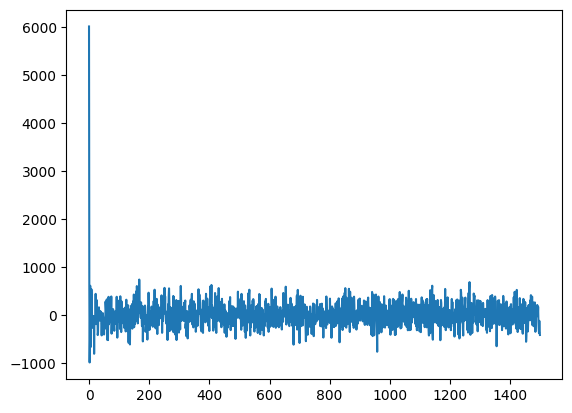

In [23]:
from scipy.fft import fft

ff = fft(list(df["comp"]))
plt.plot(ff[0:1500])

In [15]:
df = df.with_columns(pl.DataFrame(sentiment_scores))

# Print DataFrame
df.write_parquet("processed_bundestags_daten.parquet")
print(df)

shape: (374_076, 11)
┌───────────┬────────────┬───────────────────┬────────────┬───┬───────┬───────┬─────────┬──────────┐
│ firstName ┆ lastName   ┆ speechContent     ┆ date       ┆ … ┆ neu   ┆ pos   ┆ comp    ┆ compound │
│ ---       ┆ ---        ┆ ---               ┆ ---        ┆   ┆ ---   ┆ ---   ┆ ---     ┆ ---      │
│ str       ┆ str        ┆ str               ┆ str        ┆   ┆ f64   ┆ f64   ┆ f64     ┆ f64      │
╞═══════════╪════════════╪═══════════════════╪════════════╪═══╪═══════╪═══════╪═════════╪══════════╡
│ null      ┆ adenauer   ┆ Ja.               ┆ 1949-09-15 ┆ … ┆ 1.0   ┆ 0.0   ┆ 0.0     ┆ 0.0      │
│           ┆            ┆                   ┆            ┆   ┆       ┆       ┆         ┆          │
│ null      ┆ blücher    ┆ Herr Präsident,   ┆ 1949-09-15 ┆ … ┆ 1.0   ┆ 0.0   ┆ 0.0     ┆ 0.0      │
│           ┆            ┆ meine Damen un…   ┆            ┆   ┆       ┆       ┆         ┆          │
│ null      ┆ schmid     ┆ Meine Damen und   ┆ 1949-09-15 ┆ … ┆ 1.0   